In [45]:
import pickle
import numpy as np
import sys
sys.path.insert(0, '/home/abrahamn/21cmIRxcor/')
import cat_utils

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io.votable import parse
from astropy.table import Table

from scipy.optimize import curve_fit

In [69]:
#d = '/home/abrahamn/xcor_data/analysis/ATLAS_mwa57639/whole_field/'
d = '/home/abrahamn/xcor_data/analysis/ATLAS_mwa57694_rereduction/0298I_0302I_0306I_0318I_0322I_0326I_0338I_0342I_0346I/'

sefluxname = 'best'
#secat = pickle.load( open(d+'whole_field_secat_'+sefluxname+'.p', "rb" ) )
# secat = pickle.load( open(d+'whole_field_secat_best_magoffset=0.279.p', "rb" ) )
secat = pickle.load( open(d+'0298I_0302I_0306I_0318I_0322I_0326I_0338I_0342I_0346I_secat_best.p', "rb" ) )
g = secat.jy>1.e-10
secat = cat_utils.Catalog(secat.ra[g],secat.dec[g],secat.jy[g])

In [70]:
secat.jy

array([  4.16587673e-01,   1.01974820e-03,   1.40920122e-07, ...,
         2.23379946e-03,   2.85136655e-03,   1.60795485e-03])

In [71]:
# apass cat
apasscatdat = np.genfromtxt('/home/abrahamn/xcor_data/ir_catalogs/apass_6degcat.csv',skip_header=2,delimiter=',')
has_iprime_mag = np.logical_not(np.isnan(apasscatdat[:,23]))
apass_cat = cat_utils.Catalog(apasscatdat[has_iprime_mag,2],apasscatdat[has_iprime_mag,3],3631.*10.**(-apasscatdat[has_iprime_mag,23]/2.5))

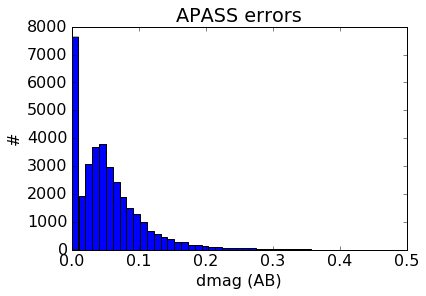

In [72]:
h = plt.hist(apasscatdat[has_iprime_mag,24],np.linspace(0,.5))
plt.xlabel('dmag (AB)')
plt.ylabel('#')
plt.title('APASS errors')

In [73]:
# # dophot cat
# dophot_cat = cat_utils.IRCatalog('/home/abrahamn/xcor_data/ATLAS_mwa57694_rereduction/02a57694o0281I.dph')
# dophot_cat.ra = dophot_cat.ra_all
# dophot_cat.dec = dophot_cat.dec_all
# dophot_cat.jy = dophot_cat.jy_all

In [74]:
# plt.plot(dophot_cat.ra_all,dophot_cat.dec_all,'.')

In [75]:
# # to get early skymapper data, do a cone search through an australian proxy
# # http://skymapper.anu.edu.au.prx.teleport.to/edr_cone/query?RA=1&DEC=-29&SR=.35&VERB=2

# # need to edit the xml file and change datatypes "character(18)" and "character(3)" to "char"
# catdir = '/home/abrahamn/xcor_data/ir_catalogs/'
# skymappercatraw = parse(catdir + 'view-source_skymapper.anu.edu.au.prx.teleport.to_edr_cone_query_RA=1&DEC=-29&SR=.35&VERB=2.xml').get_first_table().array

In [76]:
# skymappercatraw.dtype

In [77]:
# # http://skymapper.anu.edu.au/table-browser/
# ra = skymappercatraw['raj2000']
# dec = skymappercatraw['dej2000']
# flags = skymappercatraw['flags']
# ab_mag_psf = skymappercatraw['i_psf'] # mag measured by psf fitting
# d_ab_mag_psf = skymappercatraw['e_i_psf'] # mag measured by psf fitting
# ab_mag_petro = skymappercatraw['i_petro'] # mag measured in an azimuthally averaged radius, see http://www.sdss.org/dr12/algorithms/magnitudes/#mag_petro

# jy_psf = 3631.*10.**(-ab_mag_psf/2.5)
# jy_petro = 3631.*10.**(-ab_mag_petro/2.5)

# skymapper_cat = cat_utils.Catalog(ra,dec,jy_psf)

In [78]:
# h = plt.hist(apasscatdat[has_iprime_mag,24],np.linspace(0,.5),histtype='step',label='apass errors',normed=True,color='red')
# h = plt.hist(d_ab_mag_psf,np.linspace(0,.5),histtype='step',label='skymapper errors',normed=True,color='blue')
# plt.xlabel('dmag (AB)')
# plt.ylabel('#')
# plt.legend()
# plt.title('mag errors')

In [79]:
# secat = secat.bound_with_cat(skymapper_cat)
# dophot_cat = dophot_cat.bound_with_cat(skymapper_cat)
# apass_cat = apass_cat.bound_with_cat(skymapper_cat)

In [80]:
# plt.figure(figsize=(20,15))
# plt.scatter(ra,dec,25000*skymapper_cat.jy,edgecolor='none',facecolor='red')

# plt.scatter(secat_bounded.ra,secat_bounded.dec,25000*secat_bounded.jy,facecolor='none')
# plt.scatter(dophot_cat_bounded.ra,dophot_cat_bounded.dec,25000*dophot_cat_bounded.jy,facecolor='none',edgecolor='blue')

# plt.scatter(apass_cat_bounded.ra,apass_cat_bounded.dec,25000*apass_cat_bounded.jy,facecolor='none',edgecolor='cyan')

In [81]:
# for each sextractor source, look for matching dophot and source extractor sources

# cats = [apass_cat,dophot_cat,skymapper_cat]
cats = [apass_cat]
catnames = ['APASS','ATLAS/dophot','skymapper']
indices_matching_srcs = np.zeros((len(cats),len(secat.jy)),dtype=int)-1 # -1 if no match
for cati in range(len(cats)):
    for i in range(len(secat.jy)):
        if i % 100 == 0: print('%f'%(1.*i/len(secat.jy)))
        asec_to_all_cat_sources = np.sqrt((secat.dec[i]-cats[cati].dec)**2+np.sin(secat.dec[i]*np.pi/180)**2*(secat.ra[i]-cats[cati].ra)**2)*3600.
        if np.min(asec_to_all_cat_sources) < 1:
            indices_matching_srcs[cati,i] = np.argmin(asec_to_all_cat_sources)

0.000000
0.001968
0.003935
0.005903
0.007870
0.009838
0.011806
0.013773
0.015741
0.017709
0.019676
0.021644
0.023611
0.025579
0.027547
0.029514
0.031482
0.033449
0.035417
0.037385
0.039352
0.041320
0.043287
0.045255
0.047223
0.049190
0.051158
0.053126
0.055093
0.057061
0.059028
0.060996
0.062964
0.064931
0.066899
0.068866
0.070834
0.072802
0.074769
0.076737
0.078705
0.080672
0.082640
0.084607
0.086575
0.088543
0.090510
0.092478
0.094445
0.096413
0.098381
0.100348
0.102316
0.104283
0.106251
0.108219
0.110186
0.112154
0.114122
0.116089
0.118057
0.120024
0.121992
0.123960
0.125927
0.127895
0.129862
0.131830
0.133798
0.135765
0.137733
0.139701
0.141668
0.143636
0.145603
0.147571
0.149539
0.151506
0.153474
0.155441
0.157409
0.159377
0.161344
0.163312
0.165279
0.167247
0.169215
0.171182
0.173150
0.175118
0.177085
0.179053
0.181020
0.182988
0.184956
0.186923
0.188891
0.190858
0.192826
0.194794
0.196761
0.198729
0.200697
0.202664
0.204632
0.206599
0.208567
0.210535
0.212502
0.214470
0.216437
0

In [82]:
def jy2mag(jy):
    return -2.5*np.log10(jy/3631.)

In [83]:
len(secat.jy)

50823

In [84]:
np.sum(indices_matching_srcs[0,:]>0)

9515

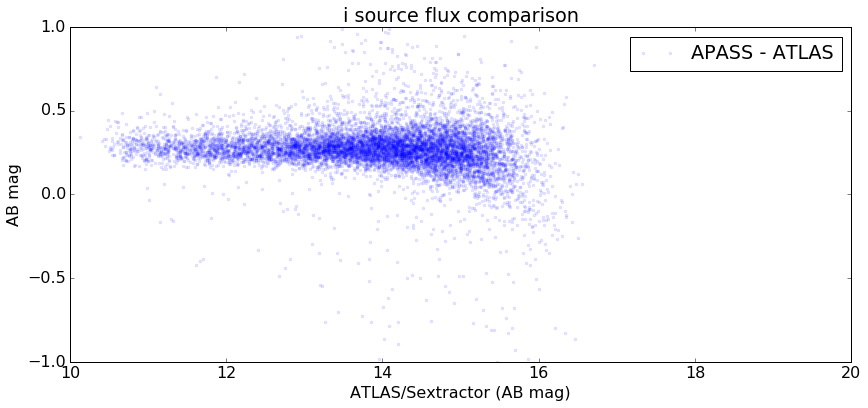

In [85]:
plt.figure(figsize=(14,6))

stys = ['b.','r.','c.']

for cati in range(len(cats)):
    plt.plot(jy2mag(secat.jy[indices_matching_srcs[cati,:]>0]),\
             jy2mag(cats[cati].jy[indices_matching_srcs[cati,indices_matching_srcs[cati,:]>0]])-jy2mag(secat.jy[indices_matching_srcs[cati,:]>0]),stys[cati],\
             label=str(catnames[cati])+' - ATLAS',alpha=.1)

plt.xlim([10,20])
plt.ylabel('AB mag')
plt.legend()
plt.ylim([-1,1])
plt.xlabel('ATLAS/Sextractor (AB mag)')
plt.title('i source flux comparison')

#plt.savefig('skymapper_vs_dophot_vs_se_'+sefluxname+'.png',bbox_inches='tight')

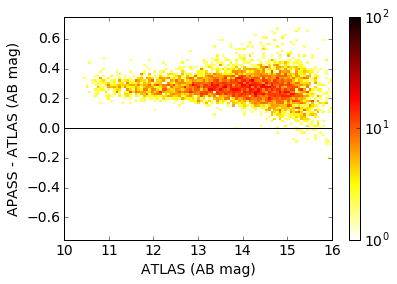

In [88]:
matplotlib.rcParams.update({'font.size': 14})
b = [np.linspace(10,16,100),np.linspace(-.75,.75,100)]
h = plt.hist2d(jy2mag(secat.jy[indices_matching_srcs[0,:]>0]),\
           jy2mag(cats[0].jy[indices_matching_srcs[0,indices_matching_srcs[0,:]>0]])-jy2mag(secat.jy[indices_matching_srcs[0,:]>0]),\
           bins=b,\
           norm=matplotlib.colors.LogNorm(),cmap='hot_r',vmin=1,vmax=100)
plt.colorbar()
plt.plot([10,16],[0,0],'k-')
plt.xlabel('ATLAS (AB mag)')
plt.ylabel('APASS - ATLAS (AB mag)')

In [89]:
magdiff = jy2mag(cats[0].jy[indices_matching_srcs[0,indices_matching_srcs[0,:]>0]])-jy2mag(secat.jy[indices_matching_srcs[0,:]>0])
brightenough = jy2mag(secat.jy[indices_matching_srcs[0,:]>0])<13
counts,binedges = np.histogram(magdiff[brightenough],np.linspace(.1,.5,30))
bins = .5*(binedges[1:]+binedges[:-1])

def gauss(x, *p):
    mu, sigma = p
    return np.max(counts)*np.exp(-(x-mu)**2/(2.*sigma**2))

In [90]:
coeff, var_matrix = curve_fit(gauss, bins, counts,p0=[.3,.05])

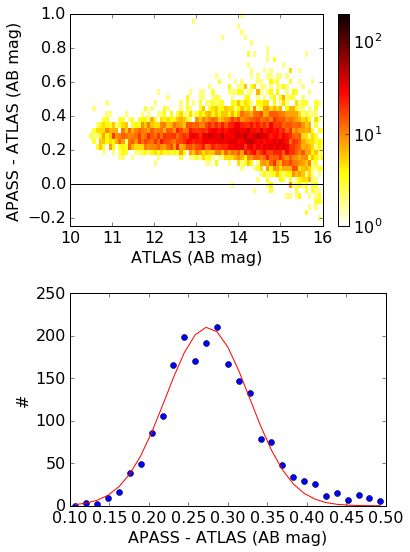

In [91]:
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(6,8))

plt.subplot(211)
b = [np.linspace(10,16,80),np.linspace(-.25,1,40)]
h = plt.hist2d(jy2mag(secat.jy[indices_matching_srcs[0,:]>0]),\
           jy2mag(cats[0].jy[indices_matching_srcs[0,indices_matching_srcs[0,:]>0]])-jy2mag(secat.jy[indices_matching_srcs[0,:]>0]),\
           bins=b,norm=matplotlib.colors.LogNorm(),cmap='hot_r',vmin=1,vmax=200)
plt.colorbar()
plt.plot([10,16],[0,0],'k-')
plt.xlabel('ATLAS (AB mag)')
plt.ylabel('APASS - ATLAS (AB mag)')

plt.subplot(212)
plt.plot(bins,counts,'o')
plt.plot(bins,gauss(bins,*coeff),'r-')
plt.xlabel('APASS - ATLAS (AB mag)')
plt.ylabel('#')

plt.tight_layout()

# plt.savefig('ATLAS_vs_APASS_cal.pdf',bbox_inches='tight')

In [92]:
coeff[0]

0.27422563466573774

In [93]:
.279/np.sqrt(np.sum(counts))

0.0061711166750931341

In [94]:
# 0.279 \pm 0.01

In [25]:
0.04

0.04